In [138]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 

from joblib import load 
from matplotlib.patches import Rectangle

# Plot gridsearch results for each method

In [139]:

def latex_fonts(small=15, medium=18, big=18):
        # Function for setting the latex fonts
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        
        plt.rc('font', size=small)          # controls default text sizes
        plt.rc('axes', titlesize=medium)     # fontsize of the axes title
        plt.rc('axes', labelsize=medium)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
        plt.rc('legend', fontsize=small)    # legend fontsize
        plt.rc('figure', titlesize=big)  # fontsize of the figure title


def plot_grid_from_pivot(pivot_data, x_label, y_label, save_name=None, vmin=None, vmax=None):
    # Function for plotting heatmaps from pivot data
    plt.figure(figsize=(5, 4))
    
        
    latex_fonts(small=16, medium=19)
    # Plotting the heatmap
    ax = sns.heatmap(pivot_data, annot=True, fmt=".3f", cmap="YlGn", cbar_kws={'label': 'Accuracy', 'format': '%.3f'}, vmin=vmin, vmax=vmax)
    # Highlight the best score
    max_val = pivot_data.max().max()  # Find the maximum value in the pivoted data
    best_loc = pivot_data.stack().idxmax()
    row, col = best_loc  # Unpack the tuple
    col_idx = pivot_data.columns.get_loc(col)  # Get column index
    row_idx = pivot_data.index.get_loc(row)  # Get row index
    rect = Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='gold', lw=2, linestyle="--")
    ax.add_patch(rect)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if save_name:
        plt.savefig(save_name, bbox_inches='tight')
    plt.show()
    

## Bagging

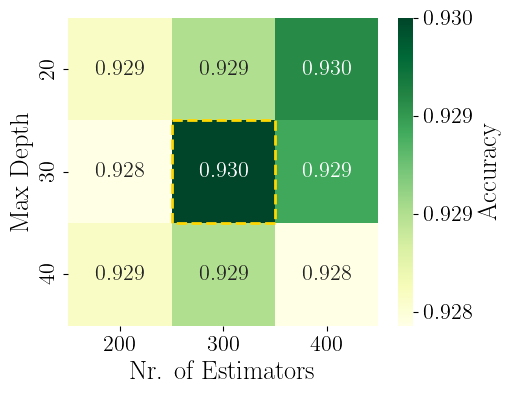

In [199]:
bagging_gs = pd.read_csv('grid_search_data/bagging_zoomed_grid_search_cv5_n_estimators_200_300_400_500_estimator__max_depth_10_20_30_40.csv')

heatmap_data = bagging_gs.pivot(index="param_estimator__max_depth", columns="param_n_estimators", values="mean_test_score")

selected_max_depth = [20, 30, 40]  
selected_estimators = [200,300,400]  
# Filter the DataFrame based on selected values
filtered_bagging_gs = bagging_gs[bagging_gs["param_estimator__max_depth"].isin(selected_max_depth) & bagging_gs["param_n_estimators"].isin(selected_estimators)]

heatmap_data = filtered_bagging_gs.pivot(index="param_estimator__max_depth", columns="param_n_estimators", values="mean_test_score")

# plot the heatmap
plot_grid_from_pivot(heatmap_data, "Nr. of Estimators", "Max Depth", save_name='figures/bagging_grid.pdf')

## Random forest

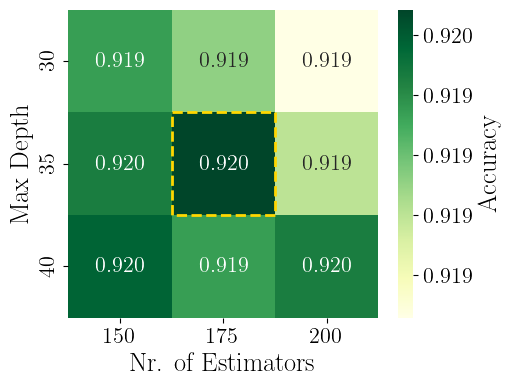

In [200]:
rf_gs = pd.read_csv('grid_search_data/rf_zoomed_grid_search_cv5_n_estimators_150_175_200_225_250_275_300_max_depth_25_30_35_40_45_50_55_60.csv')

heatmap_data = rf_gs.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")

selected_max_depth = [30, 35, 40]  
selected_estimators = [150, 175, 200]  
# Filter the DataFrame based on selected values
filtered_rf_gs = rf_gs[rf_gs["param_max_depth"].isin(selected_max_depth) & rf_gs["param_n_estimators"].isin(selected_estimators)]

# Pivot the filtered data
heatmap_data = filtered_rf_gs.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")

# plot the heatmap
plot_grid_from_pivot(heatmap_data, "Nr. of Estimators", "Max Depth", save_name='figures/rf_grid.pdf')

## Boosting

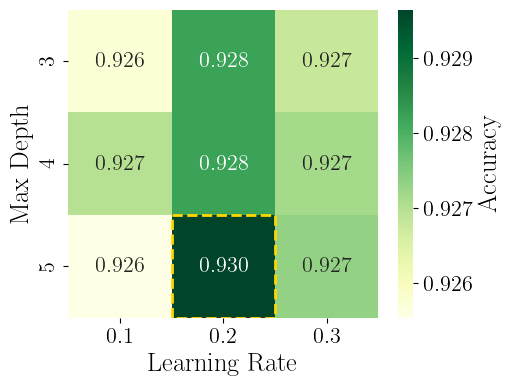

In [211]:
gb_gs = pd.read_csv("grid_search_data/gb_grid_search_n_estimators_75_100_125_150_max_depth_3_4_5_6_learning_rate_0.3_0.2_0.1_0.05.csv")

gb_gs = gb_gs[~((gb_gs["param_max_depth"]==6))]
gb_gs = gb_gs[~((gb_gs["param_learning_rate"]==0.05))]


indx = 'param_max_depth'
cols = 'param_learning_rate'

best_scores = gb_gs.groupby([indx, cols], as_index=False)["mean_test_score"].max()


heatmap_data = best_scores.pivot(index=indx, columns=cols, values="mean_test_score")


# plot the heatmap
plot_grid_from_pivot(heatmap_data, "Learning Rate", "Max Depth", save_name='figures/gb_grid.pdf')


## XGBoost

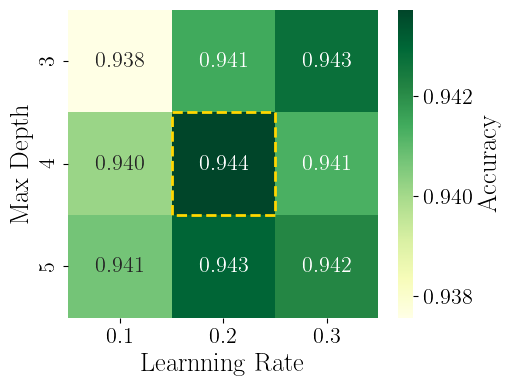

In [212]:
# xgb_gs1 = pd.read_csv("grid_search_data/xgb_grid_search_max_depth_2_3_4_5_learning_rate_0.5_0.1_0.05_0.01.csv")
# xgb_gs2 = pd.read_csv("grid_search_data/xgb_grid_search_max_depth_3_4_learning_rate_0.5_0.1_subsample_0.5_0.7.csv")
# xgb_gs3 = pd.read_csv("grid_search_data/xgb_grid_search_max_depth_3_5_7_learning_rate_0.1_0.01_0.001.csv")
# xgb_gs4 = pd.read_csv("grid_search_data/xgb_grid_search_max_depth_3_learning_rate_0.1.csv")
# xgb_gs5 = pd.read_csv("grid_search_data/xgb_grid_search_n_estimators_25_50_100_learning_rate_0.7_0.5_0.1.csv")

# Concatenate the DataFrames
#xgb_gs = pd.concat([xgb_gs1, xgb_gs2, xgb_gs3, xgb_gs4, xgb_gs5])
# drop columns where the mean test score is NaN
xgb_gs = pd.read_csv("grid_search_data/xgb_grid_search_n_estimators_125_150_175_max_depth_3_4_5_learning_rate_0.3_0.2_0.1.csv")
xgb_gs = xgb_gs.dropna(subset=["mean_test_score"])
# remove duplicate combinations of param_max_depth and param_learning_rate
best_scores = xgb_gs.groupby([indx, cols], as_index=False)["mean_test_score"].max()

xgb_gs = xgb_gs.drop_duplicates(subset=["param_max_depth", "param_learning_rate"])


heatmap_data = best_scores.pivot(index="param_max_depth", columns="param_learning_rate", values="mean_test_score")

# plot the heatmap
plot_grid_from_pivot(heatmap_data, "Learnning Rate", "Max Depth", save_name='figures/xgb_grid.pdf')

## Logistic regression

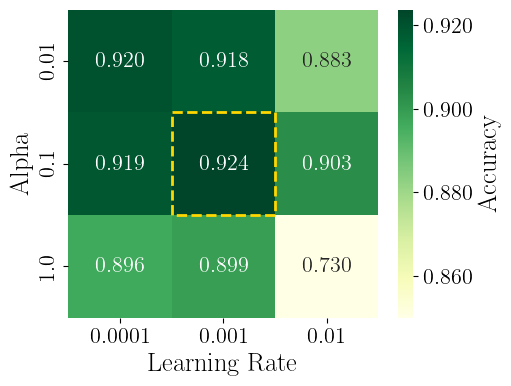

In [215]:
lr_gs = pd.read_csv('grid_search_data/mlp_logreg_grid_search_alpha_0.0001_0.001_0.01_0.1_1_learning_rate_init_0.0001_0.001_0.01_0.1.csv')
# remove regularization = [0.0001, 0.001] and learning_rate_init = 0.1 
lr_gs = lr_gs[(lr_gs.param_alpha != 0.0001) & (lr_gs.param_alpha != 0.001) & (lr_gs.param_learning_rate_init != 0.1)]

heatmap_data = lr_gs.pivot(index="param_alpha", columns="param_learning_rate_init", values="mean_test_score")
plot_grid_from_pivot(heatmap_data, "Learning Rate", "Alpha", save_name='figures/mlp_logreg_grid.pdf', vmin=0.85)

## Feed Forward Neural Network

### Architecture

/Users/sophusbg/.env/fys-stk/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sophusbg/.env/fys-stk/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.5.1 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sophusbg/.env/fys-stk/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 1.5.1 when using 

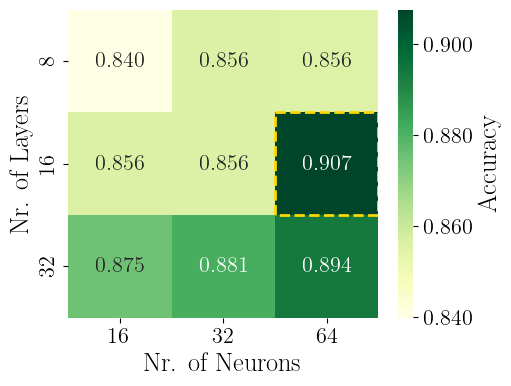

In [216]:
ffnn_gs_arch = load('grid_search_data/hidden_layer_sizes_(16, 4)_(32, 4)_(64, 4)_(16, 8)_(32, 8)_(64, 8)_(16, 16)_(32, 16)_(64, 16)_(16, 32)_(32, 32)_(64, 32).joblib')
results_df = pd.DataFrame(ffnn_gs_arch.cv_results_)
results_df['num_layers'] = results_df['param_hidden_layer_sizes'].apply(lambda x: x[1])
results_df['num_neurons'] = results_df['param_hidden_layer_sizes'].apply(lambda x: x[0])
results_df = results_df[results_df['num_layers'] != 4] # drop number of layers = 4 
results_pivot = results_df.pivot(index='num_layers', columns='num_neurons', values='mean_test_score')

# plot the heatmap
plot_grid_from_pivot(results_pivot, "Nr. of Neurons", "Nr. of Layers", save_name='figures/ffnn_grid.pdf')

### Learning rate and regularisation

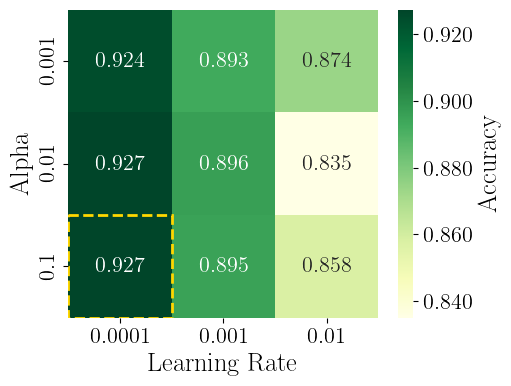

In [217]:
results_df = pd.read_csv('grid_search_data/ffnn_grid_search_relu.csv')
results_df = results_df[results_df['param_alpha'] != 0.0001]

pivot_df = results_df.pivot(
    index='param_alpha', 
    columns='param_learning_rate_init', 
    values='mean_test_score'
)

plot_grid_from_pivot(pivot_df, "Learning Rate", "Alpha", save_name='figures/ffnn_grid_relu.pdf')


# Plot max depth over accuracy for the tree methods

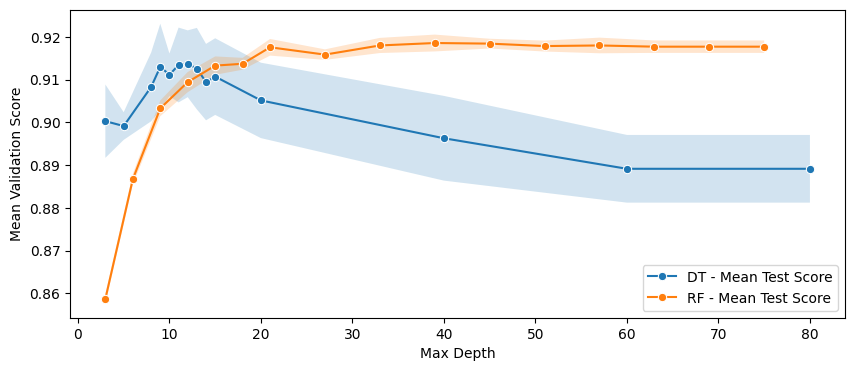

In [27]:
dt_gs = pd.read_csv('grid_search_data/dt_grid_search_max_depth_3_5_8_9_10_11_12_13_14_15_20_40_60_80_160_None.csv')
# Create ordinal-like even spacing for x-axis
dt_gs["ordinal_x"] = range(len(dt_gs))  # Assign evenly spaced values based on order
dt_gs = dt_gs[dt_gs['param_max_depth'] <= 80]

# bagging_gs = pd.read_csv('grid_search_data/bagging_zoomed_grid_search_cv5_n_estimators_200_300_400_500_estimator__max_depth_10_20_30_40.csv')
# # Create ordinal-like even spacing for x-axis
# # bagging_gs["ordinal_x"] = range(len(bagging_gs))  # Assign evenly spaced values based on order

rf_gs1 = pd.read_csv("grid_search_data/rf_grid_search_{'n_estimators'_[100, 200, 400], 'max_depth'_[3, 6, 9, 12, 15, 18, 21]}.csv")
rf_gs2 = pd.read_csv("grid_search_data/rf_grid_search_{'n_estimators'_[100, 200, 400], 'max_depth'_[21, 27, 33, 39, 45]}.csv")
rf_gs3 = pd.read_csv("grid_search_data/rf_grid_search_{'n_estimators'_[100, 200, 400], 'max_depth'_[45, 51, 57, 63, 69, 75]}.csv")
rf_gs4 = pd.read_csv("grid_search_data/rf_grid_search_cv5_{'n_estimators'_[50, 100, 200, 400, 800], 'max_depth'_[3, 5, 10, 20, 40, 60, 80, 160, None]}.csv")
rf_gs = pd.concat([rf_gs1, rf_gs2, rf_gs3]) # Splice the dataframes together
rf_gs.sort_values(by='param_max_depth')
rf_gs = rf_gs.drop_duplicates(subset='params', keep='first') # drop duplicates of params (keep the first one)


rf_gs = rf_gs[rf_gs['param_n_estimators'] == 200]
# only keep max depth values up to 60

plt.figure(figsize=(10, 4))

sns.lineplot(
    data=dt_gs,
    x="param_max_depth",
    y="mean_test_score",
    label="DT - Mean Test Score",
    marker='o',
    legend=False
)
plt.fill_between(
    dt_gs["param_max_depth"],
    dt_gs["mean_test_score"] - dt_gs["std_test_score"],
    dt_gs["mean_test_score"] + dt_gs["std_test_score"],
    alpha=0.2,
)
sns.lineplot(
    data=rf_gs,
    x="param_max_depth",
    y="mean_test_score",
    label="RF - Mean Test Score",
    marker='o',
    legend=False
)
plt.fill_between(
    rf_gs["param_max_depth"],
    rf_gs["mean_test_score"] - rf_gs["std_test_score"],
    rf_gs["mean_test_score"] + rf_gs["std_test_score"],
    alpha=0.2,
)
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Mean Validation Score")
# sns.lineplot(
#     data=bagging_gs,
#     x="param_estimator__max_depth",
#     y="mean_test_score",
#     label="Mean Test Score",
#     marker='o', 
# )
# plt.fill_between(
#     bagging_gs["param_estimator__max_depth"],
#     bagging_gs["mean_test_score"] - bagging_gs["std_test_score"],
#     bagging_gs["mean_test_score"] + bagging_gs["std_test_score"],
#     alpha=0.2,
#     label="±1 Std Dev"
# )
plt.show()

## Plot ROC curves

In [140]:
# load models ONLY NEED TO DO THIS ONCE (FILES SAVED IN ROC_CORVES FOLDER)
dt_model= load(f'models/best_decision_tree_model_val_acc_91.37.joblib')
# bagging_model = load(f'models/best_bagging_model_val_acc_93.00.joblib')
rf_model = load(f'models/best_rf_model_val_acc_91.99.joblib')
# gb_model = load(f'models/best_gb_model_val_acc_93.79.joblib')
xgb_model = load(f'models/best_xgb_model_val_acc_94.37.joblib')
# ffnn_model = load(f'models/best_ffnn_model_relu.joblib')
# log_reg_model = load(f'models/best_mlp_logreg_model_val_acc_92.37.joblib')

c:\Users\jakob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\jakob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


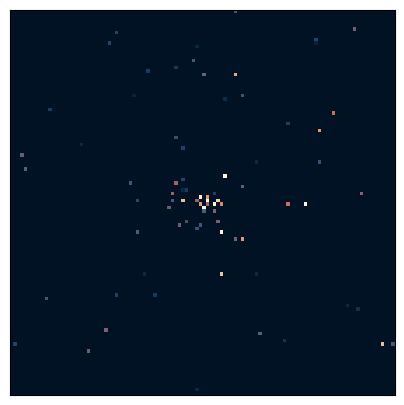

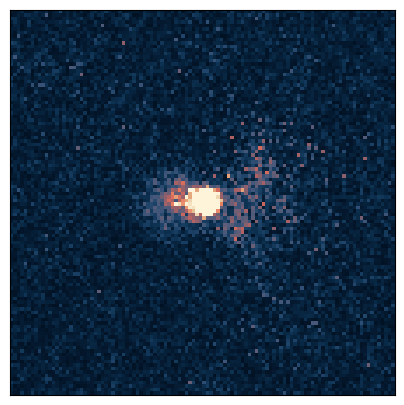

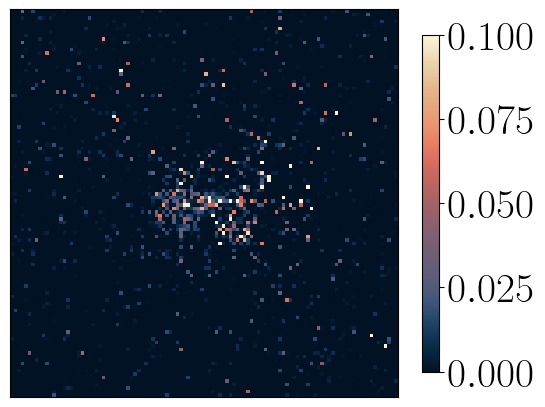

In [174]:
import cmcrameri.cm as cmc
import matplotlib as mpl
im_dt = dt_model.feature_importances_
im_rf = rf_model.feature_importances_
im_xb = xgb_model.feature_importances_
# fig, ax = plt.subplots(1,3, figsize = (10,10))
im_dt_scaled = im_dt.reshape(110,110)
im_rf_scaled = im_rf.reshape(110,110)
im_xb_scaled = im_xb.reshape(110,110)
# pos0 =  ax[0].imshow(im_dt_scaled, vmin = 0.0, vmax = 0.0005, cmap = cmc.lipari)#np.max(im_dt))
# pos1 =  ax[1].imshow(im_rf_scaled, vmin = 0.0, vmax = 0.0005, cmap = cmc.lipari)#np.max(im_rf))
# pos2 =  ax[2].imshow(im_xb_scaled, vmin = 0.0, vmax = 0.0005, cmap = cmc.lipari)#np.max(im_xb))
# ax[0].set_yticks([]); ax[0].set_xticks([])
# ax[1].set_yticks([]); ax[1].set_xticks([])
# ax[2].set_yticks([]); ax[2].set_xticks([])
# #cbar0 = fig.colorbar(pos0, ax=ax[0], shrink=0.235)
# #cbar0.minorticks_on()
# #cbar1 = fig.colorbar(pos1, ax=ax[1], shrink=0.235)
# #cbar1.minorticks_on()
# fig.subplots_adjust(bottom=0.5, wspace=0.03)
# cbar2 = fig.colorbar(pos2, ax=list(ax.ravel()), orientation='horizontal', pad = 0.015)#location='bottom')#, shrink=0.235)
# cbar2.minorticks_on()
# plt.show()

#fig, ax = plt.subplots(1,3, figsize = (15,15))
latex_fonts(small=30)

fig = plt.figure(figsize=(5,5))
im_dt_norm = ((im_dt-np.min(im_dt))/(np.max(im_dt)-np.min(im_dt))).reshape(110,110)
plt.imshow(im_dt_norm, vmin = 0.0, vmax = 0.1, cmap = cmc.lipari)
plt.xticks([]); plt.yticks([])
plt.savefig('./figures/dt_feature_importance.pdf', bbox_inches = 'tight')

fig = plt.figure(figsize=(5,5))
im_rf_norm = ((im_rf-np.min(im_rf))/(np.max(im_rf)-np.min(im_rf))).reshape(110,110)
plt.imshow(im_rf_norm, vmin = 0.0, vmax = 0.1, cmap = cmc.lipari)
plt.xticks([]); plt.yticks([])
plt.savefig('./figures/rf_feature_importance.pdf', bbox_inches = 'tight')

fig, ax = plt.subplots(figsize=(6.25,6.25))
im_xb_norm = ((im_xb-np.min(im_xb))/(np.max(im_xb)-np.min(im_xb))).reshape(110,110)
im = ax.imshow(im_xb_norm, vmin = 0.0, vmax = 0.1, cmap = cmc.lipari)
plt.xticks([]); plt.yticks([])
cbar = plt.colorbar(im,ax=ax, shrink=0.7)
plt.savefig('./figures/xb_feature_importance.pdf', bbox_inches = 'tight')
#pos0 =  ax[0].imshow(im_dt_norm.reshape(110,110), vmin = 0.0, vmax = 0.1, cmap = cmc.lipari)#, norm=norm)#np.max(im_dt))
#pos1 =  ax[1].imshow(im_rf_norm.reshape(110,110), vmin = 0.0, vmax = 0.1, cmap = cmc.lipari)#, norm=norm)#np.max(im_rf))
#pos2 =  ax[2].imshow(im_xb_norm.reshape(110,110), vmin = 0.0, vmax = 0.1, cmap = cmc.lipari)#, norm=norm)#np.max(im_xb))

#ax[0].set_yticks([]); ax[0].set_xticks([])
#ax[1].set_yticks([]); ax[1].set_xticks([])
#ax[2].set_yticks([]); ax[2].set_xticks([])

#fig.subplots_adjust(bottom=0.5, wspace=0.03)
#cbar2 = fig.colorbar(pos2, ax=list(ax.ravel()), orientation='horizontal', pad = 0.015)#, cmap=cmap, norm=norm, ticks=bounds, boundaries=bounds)#location='bottom')#, shrink=0.235)
#cbar2.minorticks_on()
#cbar2.ax.tick_params(labelsize=25)

#plt.savefig('./figures/Feature_importance.pdf', bbox_inches='tight')


In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score


In [58]:
# load the data
import kagglehub
import os

path = kagglehub.dataset_download("fmena14/volcanoesvenus")
files = os.listdir(path)
test_dir = os.path.join(path, "volcanoes_test")
test_files = os.listdir(test_dir)

# Load test data and labels
test_images_path = os.path.join(test_dir, "test_images.csv")
test_labels_path = os.path.join(test_dir, "test_labels.csv")

test_images = pd.read_csv(test_images_path, header=None)
test_labels = pd.read_csv(test_labels_path)
test_labels = test_labels["Volcano?"]

# Scale the data
test_images = test_images / 255

/Users/sophusbg/.env/fys-stk/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 231M/231M [00:46<00:00, 5.22MB/s] 

Extracting files...


In [ ]:
# Only need to do this once (saved in roc_curves folder)

# fpr_dt, tpr_dt, _ = roc_curve(test_labels, dt_model.predict_proba(test_images)[:, 1])
# fpr_rf, tpr_rf, _ = roc_curve(test_labels, rf_model.predict_proba(test_images)[:, 1])
# fpr_bagging, tpr_bagging, _ = roc_curve(test_labels, bagging_model.predict_proba(test_images)[:, 1])
# fpr_gb, tpr_gb, _ = roc_curve(test_labels, gb_model.predict_proba(test_images)[:, 1])
# fpr_xgb, tpr_xgb, _ = roc_curve(test_labels, xgb_model.predict_proba(test_images)[:, 1])
# fpr_ffnn, tpr_ffnn, _ = roc_curve(test_labels, ffnn_model.predict_proba(test_images)[:, 1])
# fpr_log_reg, tpr_log_reg, _ = roc_curve(test_labels, log_reg_model.predict_proba(test_images)[:, 1])

In [ ]:
# save each roc curve in roc_curves as .csv
# pd.DataFrame({"fpr": fpr_dt, "tpr": tpr_dt}).to_csv("roc_curves/dt_roc_curve.csv", index=False)
# pd.DataFrame({"fpr": fpr_rf, "tpr": tpr_rf}).to_csv("roc_curves/rf_roc_curve.csv", index=False)
# pd.DataFrame({"fpr": fpr_bagging, "tpr": tpr_bagging}).to_csv("roc_curves/bagging_roc_curve.csv", index=False)
# pd.DataFrame({"fpr": fpr_gb, "tpr": tpr_gb}).to_csv("roc_curves/gb_roc_curve.csv", index=False)
# pd.DataFrame({"fpr": fpr_xgb, "tpr": tpr_xgb}).to_csv("roc_curves/xgb_roc_curve.csv", index=False)
# pd.DataFrame({"fpr": fpr_ffnn, "tpr": tpr_ffnn}).to_csv("roc_curves/ffnn_roc_curve.csv", index=False)
# pd.DataFrame({"fpr": fpr_log_reg, "tpr": tpr_log_reg}).to_csv("roc_curves/log_reg_roc_curve.csv", index=False)

In [176]:
# Load the roc curves
dt_roc = pd.read_csv("roc_curves/dt_roc_curve.csv")
rf_roc = pd.read_csv("roc_curves/rf_roc_curve.csv")
bagging_roc = pd.read_csv("roc_curves/bagging_roc_curve.csv")
gb_roc = pd.read_csv("roc_curves/gradient_boosting_ROC.csv")
xgb_roc = pd.read_csv("roc_curves/extreme_gradient_boosting_ROC.csv")
ffnn_roc = pd.read_csv("roc_curves/ffnn_roc_curve.csv")
log_reg_roc = pd.read_csv("roc_curves/log_reg_roc_curve.csv")

In [177]:
plt.style.use('default')

In [200]:
#Creating nice cmap
cmap = cmc.lipari(np.linspace(0.15,1,8))

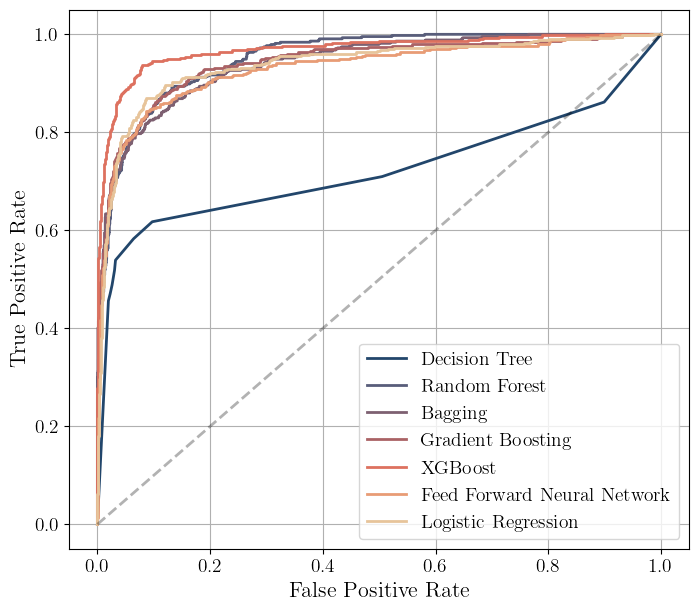

In [201]:


# Plot ROC curves
plt.figure(figsize=(8, 7))
latex_fonts(small=14, medium=16)

plt.plot(dt_roc["fpr"], dt_roc["tpr"], label="Decision Tree", linewidth=2, alpha=1, c = cmap[0])
plt.plot(rf_roc["fpr"], rf_roc["tpr"], label="Random Forest", linewidth=2, alpha=1, c = cmap[1])
plt.plot(bagging_roc["fpr"], bagging_roc["tpr"], label="Bagging", linewidth=2, alpha=1, c = cmap[2]) 
plt.plot(gb_roc["fpr"], gb_roc["tpr"], label="Gradient Boosting", linewidth=2, alpha=1, c = cmap[3])
plt.plot(xgb_roc["fpr"], xgb_roc["tpr"], label="XGBoost", linewidth=2, alpha=1, c = cmap[4])
plt.plot(ffnn_roc["fpr"], ffnn_roc["tpr"], label="Feed Forward Neural Network", linewidth=2, alpha=1, c = cmap[5])
plt.plot(log_reg_roc["fpr"], log_reg_roc["tpr"], label="Logistic Regression", linewidth=2, alpha=1, c = cmap[6])
plt.plot([0, 1], [0, 1], linestyle="--", color="black", linewidth=2, alpha=0.3)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(facecolor='white')
plt.grid()
# plt.savefig("figures/roc_curves.pdf", bbox_inches='tight')
plt.show()


In [ ]:
# Calculate AUC
# auc_dt = roc_auc_score(test_labels, dt_model.predict_proba(test_images)[:, 1])
# print(f"Decision Tree AUC: {auc_dt}")
# auc_rf = roc_auc_score(test_labels, rf_model.predict_proba(test_images)[:, 1])
# print(f"Random Forest AUC: {auc_rf}")
# auc_bagging = roc_auc_score(test_labels, bagging_model.predict_proba(test_images)[:, 1])
# print(f"Bagging AUC: {auc_bagging}")
# auc_gb = roc_auc_score(test_labels, gb_model.predict_proba(test_images)[:, 1])
# print(f"Gradient Boosting AUC: {auc_gb}")
# auc_xgb = roc_auc_score(test_labels, xgb_model.predict_proba(test_images)[:, 1])
# print(f"Extreme Gradient Boosting AUC: {auc_xgb}")
# auc_ffnn = roc_auc_score(test_labels, ffnn_model.predict_proba(test_images)[:, 1])
# print(f"FFNN AUC: {auc_ffnn}")
# auc_log_reg = roc_auc_score(test_labels, log_reg_model.predict_proba(test_images)[:, 1])
# print(f"Logistic Regression AUC: {auc_log_reg}")



Decision Tree AUC: 0.7225646163093569
Random Forest AUC: 0.9518863955119216
Bagging AUC: 0.9416279302744941
Gradient Boosting AUC: 0.9431456621919454
Extreme Gradient Boosting AUC: 0.9691715087156884
FFNN AUC: 0.9312913243838911
Logistic Regression AUC: 0.9393227810058105


In [190]:
auc_scores = {
    "Decision Tree": 0.7225646163093569,
    "Random Forest": 0.9518863955119216,
    "Bagging": 0.9416279302744941,
    "Gradient Boosting": 0.9431456621919454,
    "XGBoost": 0.9691715087156884,
    "FFNN": 0.9312913243838911,
    "Logistic Regression": 0.9393227810058105
}

In [191]:
plt.style.use('default')


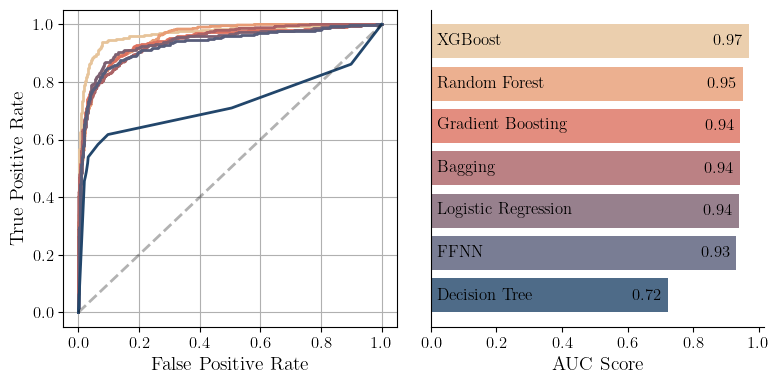

In [202]:
# plot the ROC curves and AUC scores in subplots
plt.figure(figsize=(8, 4))
medium_fs = 14
latex_fonts(small=12, medium=medium_fs)

colors = cmc.lipari(np.linspace(0.15,1,8))#sns.color_palette('muted')

plt.subplot(1, 2, 1)
plt.plot(xgb_roc["fpr"], xgb_roc["tpr"], label="XGBoost", linewidth=2, color=colors[6])
plt.plot(rf_roc["fpr"], rf_roc["tpr"], label="Random Forest", linewidth=2, color=colors[5])
plt.plot(gb_roc["fpr"], gb_roc["tpr"], label="Gradient Boosting", linewidth=2, color=colors[4])
plt.plot(bagging_roc["fpr"], bagging_roc["tpr"], label="Bagging", linewidth=2, color=colors[3])
plt.plot(log_reg_roc["fpr"], log_reg_roc["tpr"], label="Logistic Regression", linewidth=2, color=colors[2])
plt.plot(ffnn_roc["fpr"], ffnn_roc["tpr"], label="FFNN", linewidth=2, color=colors[1])
plt.plot(dt_roc["fpr"], dt_roc["tpr"], label="Decision Tree", linewidth=2, color=colors[0])
plt.plot([0, 1], [0, 1], linestyle="--", color="black", linewidth=2, alpha = 0.3)
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


# plt.legend(facecolor='white')

plt.subplot(1, 2, 2)
# Create horizontal bars

# Sort the AUC scores
sorted_auc_scores = dict(sorted(auc_scores.items(), key=lambda item: item[1]))

# Create horizontal bars
bars = plt.barh(list(sorted_auc_scores.keys()), list(sorted_auc_scores.values()), color=colors, alpha=0.8)

# Add tick labels (names) and scores inside the bars
for bar, name in zip(bars, sorted_auc_scores.keys()):

    plt.text(
        0.02,  # Slightly offset from the left edge
        bar.get_y() + bar.get_height() / 2,  # Center vertically
        name,  # Name label
        va="center",
        ha="left",  # Align text to the left
        color='black',
        fontsize=medium_fs-2
    )
    plt.text(
        bar.get_width() - 0.02,  # Slightly offset from the right edge
        bar.get_y() + bar.get_height() / 2,  # Center vertically
        f"{bar.get_width():.2f}",  # Score label
        va="center",
        ha="right",  # Align text to the right
        color="black",
        fontsize=medium_fs-2
    )

# plt.gca().invert_yaxis()  # Invert y-axis for better readability (optional)
plt.xlabel("AUC Score")
plt.yticks([])  # Remove x-axis tick marks

# remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.tight_layout()
plt.savefig("figures/roc_auc_revised.pdf", bbox_inches='tight')
plt.show()



In [161]:
# Calculate accuracy
dt_acc = accuracy_score(test_labels, dt_model.predict(test_images))
print(f"Decision Tree Accuracy: {dt_acc}")
rf_acc = accuracy_score(test_labels, rf_model.predict(test_images))
print(f"Random Forest Accuracy: {rf_acc}")
bagging_acc = accuracy_score(test_labels, bagging_model.predict(test_images))
print(f"Bagging Accuracy: {bagging_acc}")
# gb_acc = accuracy_score(test_labels, gb_model.predict(test_images))
# print(f"Gradient Boosting Accuracy: {gb_acc}")
ffnn_acc = accuracy_score(test_labels, ffnn_model.predict(test_images))
print(f"FFNN Accuracy: {ffnn_acc}")
log_reg_acc = accuracy_score(test_labels, log_reg_model.predict(test_images))
print(f"Logistic Regression Accuracy: {log_reg_acc}")



Decision Tree Accuracy: 0.8979517190929042
Random Forest Accuracy: 0.9070958302852963
Bagging Accuracy: 0.9202633504023409
FFNN Accuracy: 0.9246525237746891
Logistic Regression Accuracy: 0.929407461594733


In [204]:
accuracy_scores = {
    "Decision Tree": 0.8979517190929042,
    "Random Forest": 0.9070958302852963,
    "Bagging": 0.9202633504023409,
    "Gradient Boosting": 0.9198975859546452,
    "XGBoost": 0.9403803950256036,
    "FFNN": 0.9246525237746891,
    "Logistic Regression": 0.929407461594733
}

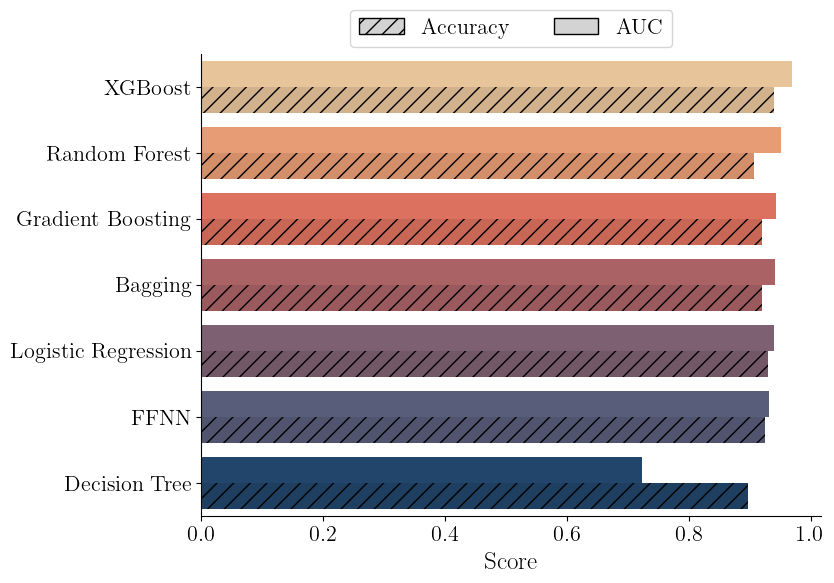

In [ ]:
# bar plot of auc and accuracy scores in the same plot with one bar for accuracy and one for auc for each method
plt.figure(figsize=(8, 6))
medium_fs = 18
latex_fonts(small=16, medium=medium_fs)

# Create a DataFrame for plotting
df_scores = pd.DataFrame({
    'Model': list(auc_scores.keys()),
    'AUC': list(auc_scores.values()),
    'Accuracy': list(accuracy_scores.values())
})
# sort the DataFrame by AUC
df_scores = df_scores.sort_values(by='AUC', ascending=False)

# Melt the DataFrame to long format
df_melted = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

cmap = list(cmc.lipari(np.linspace(0.15,1,8)))
# plt.plot(xgb_roc["fpr"], xgb_roc["tpr"], label="XGBoost", linewidth=2, color=colors[6])
# plt.plot(rf_roc["fpr"], rf_roc["tpr"], label="Random Forest", linewidth=2, color=colors[5])
# plt.plot(gb_roc["fpr"], gb_roc["tpr"], label="Gradient Boosting", linewidth=2, color=colors[4])
# plt.plot(bagging_roc["fpr"], bagging_roc["tpr"], label="Bagging", linewidth=2, color=colors[3])
# plt.plot(log_reg_roc["fpr"], log_reg_roc["tpr"], label="Logistic Regression", linewidth=2, color=colors[2])
# plt.plot(ffnn_roc["fpr"], ffnn_roc["tpr"], label="FFNN", linewidth=2, color=colors[1])
# plt.plot(dt_roc["fpr"], dt_roc["tpr"], label="Decision Tree", linewidth=2, color=colors[0])
# Plot the bar plot
ax = sns.barplot(x='Score', y='Model', hue='Metric', data=df_melted, alpha=1, palette=['lightgrey', 'lightgrey'])
handles, _ = ax.get_legend_handles_labels()

m = ax.containers
m[0][0].set_facecolor(cmap[6])
m[0][1].set_facecolor(cmap[5])
m[0][2].set_facecolor(cmap[4])
m[0][3].set_facecolor(cmap[3])
m[0][4].set_facecolor(cmap[2])
m[0][5].set_facecolor(cmap[1])
m[0][6].set_facecolor(cmap[0])
m[1][0].set_hatch('//')
m[1][1].set_hatch('//')
m[1][2].set_hatch('//')
m[1][3].set_hatch('//')
m[1][4].set_hatch('//')
m[1][5].set_hatch('//')
m[1][6].set_hatch('//')
m[1][0].set_facecolor(cmap[6]/1.1)
m[1][1].set_facecolor(cmap[5]/1.1)
m[1][2].set_facecolor(cmap[4]/1.1)
m[1][3].set_facecolor(cmap[3]/1.1)
m[1][4].set_facecolor(cmap[2]/1.1)
m[1][5].set_facecolor(cmap[1]/1.1)
m[1][6].set_facecolor(cmap[0]/1.1)


# write the scores on the bars
plt.ylabel('')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

import matplotlib.patches as mpatches

legend_handles = [
    mpatches.Patch(facecolor='lightgrey', edgecolor='black', label='Accuracy', hatch='//'),
    mpatches.Patch(facecolor='lightgrey', edgecolor='black', label='AUC', hatch='')
]

plt.legend(handles = legend_handles ,loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
plt.savefig("figures/accuracy_auc.pdf", bbox_inches='tight')